<a href="https://colab.research.google.com/github/yaswanthkumargothi/cuisine-name-app/blob/main/cuisine_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

In [ ]:
#install kaggle for accessing data
!pip install kaggle --upgrade


In [4]:
#make a kaggle directory in which we download .json kaggle key file
!mkdir -p ~/.kaggle/



In [5]:
#download .json file and move to the kaggle directory
!mv kaggle.json ~/.kaggle/

#make a amazon directory to store downloaded data
!mkdir -p ~/indianfood

#change path variable to Amazon directory
path = '/root/indianfood'

path

'/root/indianfood'

In [6]:
#download train file
!kaggle datasets download -d cdart99/food20dataset -p {path}

 97% 422M/435M [00:03<00:00, 138MB/s]
100% 435M/435M [00:03<00:00, 120MB/s]


In [ ]:
os.listdir(path)

['food20dataset.zip']

In [ ]:
!unzip {path}/food20dataset.zip -d {path}

In [8]:
path = '/root/indianfood/food20dataset'

In [9]:
os.listdir(path)

['train_set', 'test_set']

In [10]:
categories = os.listdir(path+'/test_set')

In [ ]:
categories

['gulab jamun',
 'dhokla',
 'poori',
 'kathi roll',
 'idly',
 'meduvadai',
 'tandoori chicken',
 'butternaan',
 'noodles',
 'vada pav',
 'biriyani',
 'ven pongal',
 'chaat',
 'halwa',
 'upma',
 'bisibelebath',
 'samosa',
 'paniyaram',
 'chappati',
 'dosa']

In [11]:


img_size = 256
def get_data(data_dir):
    data = [] 
    for category in categories: 
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img)) #[...,::-1] #convert BGR to RGB format #optional
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) #reshape
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data(path+'/train_set')
val = get_data(path+'/test_set')

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [12]:
x_train.shape

(1400, 256, 256, 3)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")
base_model.trainable = False
model = tf.keras.Sequential([base_model, tf.keras.layers.GlobalAveragePooling2D(), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(20, activation="softmax")])
model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                25620     
Total params: 2,283,604
Trainable params: 25,620
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history1 = model.fit(x_train,y_train,epochs = 200 , validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


44/44 [==============================] - 73s 2s/step - loss: 3.4244 - accuracy: 0.0543 - val_loss: 3.1231 - val_accuracy: 0.0617
Epoch 2/200
44/44 [==============================] - 69s 2s/step - loss: 3.0522 - accuracy: 0.0907 - val_loss: 2.8818 - val_accuracy: 0.1183
Epoch 3/200
44/44 [==============================] - 69s 2s/step - loss: 2.8407 - accuracy: 0.1221 - val_loss: 2.6713 - val_accuracy: 0.2033
Epoch 4/200
44/44 [==============================] - 69s 2s/step - loss: 2.6001 - accuracy: 0.2000 - val_loss: 2.4842 - val_accuracy: 0.2667
Epoch 5/200
44/44 [==============================] - 69s 2s/step - loss: 2.4249 - accuracy: 0.2686 - val_loss: 2.3149 - val_accuracy: 0.3283
Epoch 6/200
44/44 [==============================] - 70s 2s/step - loss: 2.2252 - accuracy: 0.3307 - val_loss: 2.1676 - val_accuracy: 0.3983
Epoch 7/200
44/44 [==============================] - 70s 2s/step - loss: 2.0886 - accuracy: 0.4079 - val_loss: 2.0375 - val_accuracy: 0.4500
Epoch 8/200
44/44 [======

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/myModel.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [2]:
model = tf.keras.models.load_model('/content/drive/MyDrive/myModel.h5')

In [13]:
history1 = model.fit(x_train,y_train,epochs = 15 , validation_data = (x_val, y_val))

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


44/44 [==============================] - 68s 2s/step - loss: 0.4668 - accuracy: 0.9071 - val_loss: 0.7625 - val_accuracy: 0.8017
Epoch 2/15
44/44 [==============================] - 67s 2s/step - loss: 0.4719 - accuracy: 0.9021 - val_loss: 0.7606 - val_accuracy: 0.8033
Epoch 3/15
44/44 [==============================] - 65s 1s/step - loss: 0.4615 - accuracy: 0.9079 - val_loss: 0.7493 - val_accuracy: 0.8100
Epoch 4/15
44/44 [==============================] - 65s 1s/step - loss: 0.4565 - accuracy: 0.9043 - val_loss: 0.7440 - val_accuracy: 0.8100
Epoch 5/15
44/44 [==============================] - 66s 2s/step - loss: 0.4446 - accuracy: 0.9200 - val_loss: 0.7406 - val_accuracy: 0.8117
Epoch 6/15
44/44 [==============================] - 66s 2s/step - loss: 0.4291 - accuracy: 0.9200 - val_loss: 0.7342 - val_accuracy: 0.8083
Epoch 7/15
44/44 [==============================] - 66s 2s/step - loss: 0.4408 - accuracy: 0.9079 - val_loss: 0.7286 - val_accuracy: 0.8150
Epoch 8/15
44/44 [=============

In [14]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


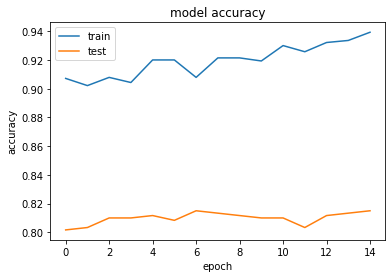

In [15]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

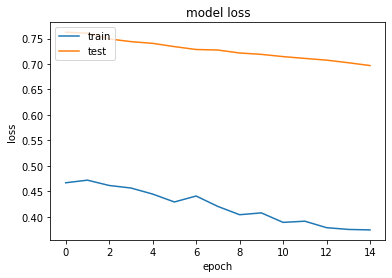

In [17]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = categories))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                  precision    recall  f1-score   support

     gulab jamun       0.97      0.97      0.97        30
          dhokla       0.82      0.93      0.87        30
           poori       0.96      0.87      0.91        30
      kathi roll       0.81      0.97      0.88        30
            idly       0.80      0.80      0.80        30
       meduvadai       0.93      0.83      0.88        30
tandoori chicken       0.88      0.93      0.90        30
      butternaan       0.84      0.70      0.76        30
         noodles       0.93      0.90      0.92        30
        vada pav       0.94      0.97      0.95        30
        biriyani       0.83      0.80      0.81        30
      ven pongal       0.73      0.90      0.81        30
           chaat       0.65      0.80      0.72        30
           halwa       0.57      0.77      0.66        30
            upma       0.54      0.63      0.58        30
    bisibelebath       0.62      0.33      0.43        30
          sam

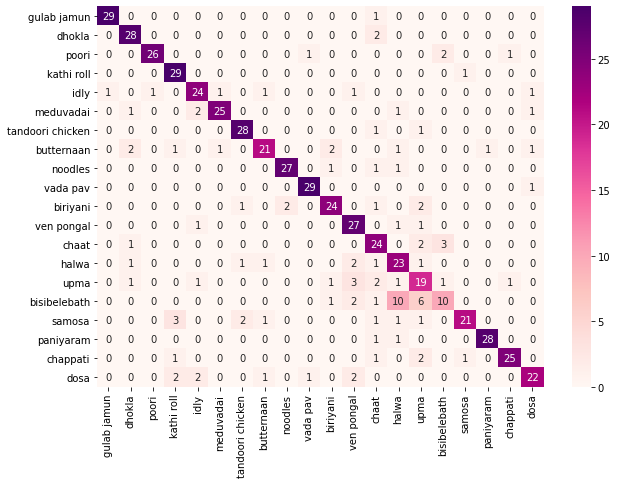

In [19]:
cm2 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm2, index = [i for i in categories],columns = [i for i in categories])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")

In [21]:
tf.saved_model.save(model,'/content/drive/MyDrive/')

AttributeError: ignored

In [22]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/MyDrive/model.tflite', 'wb') as f:
  f.write(tflite_model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmp8keuoz7u/assets


INFO:tensorflow:Assets written to: /tmp/tmp8keuoz7u/assets
